# Plotting

Figures are an efficient way of communicating **quantitative results**.

In Python the standard package for plotting is **[matplotlib](https://matplotlib.org/)**.

**Table of contents**<a id='toc0_'></a>    
- 1. [2-Dimensional plot](#toc1_)    
  - 1.1. [Calculate an utility function on a vector](#toc1_1_)    
  - 1.2. [Plot the utility function in 2-dimensions](#toc1_2_)    
  - 1.3. [zorder](#toc1_3_)    
- 2. [Other types of plots](#toc2_)    
- 3. [3-Dimensional plots](#toc3_)    
  - 3.1. [Calculate an utility function on a grid](#toc3_1_)    
  - 3.2. [Plot the utility function](#toc3_2_)    
- 4. [Trick: Show link to file](#toc4_)    
- 5. [Summary](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import numpy as np
import matplotlib.pyplot as plt # baseline module
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

# predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})

## 1. <a id='toc1_'></a>[2-Dimensional plot](#toc0_)

### 1.1. <a id='toc1_1_'></a>[Calculate an utility function on a vector](#toc0_)


Consider a Cobb-Douglas utility function

$$
u(x_1,x_2) = x_1^{\alpha}x_2^{1-\alpha}
$$

For now we fix $\alpha$ at 0.5, and $x_{2}$ at 1. And calculate utility across $x_{1}$.

In [2]:
def u_func(x1,x2,alpha=0.50):
    return x1**alpha * x2**(1-alpha)

In [3]:
# a. fixed value of x2 
x2 = 1.0

# b. vector of x1 from 0 to x_max with N values
x_max = 100.0
N = 1000
x1_vec = np.linspace(0,x_max,N)

# c. utility
u_vec = u_func(x1_vec,x2)

### 1.2. <a id='toc1_2_'></a>[Plot the utility function in 2-dimensions](#toc0_)

**Plot-object in matplotlib:**

1. `fig` is the figure object - it's the "canvas"
2. `ax` is a reference to a specific subplot on the canvas (only one here)

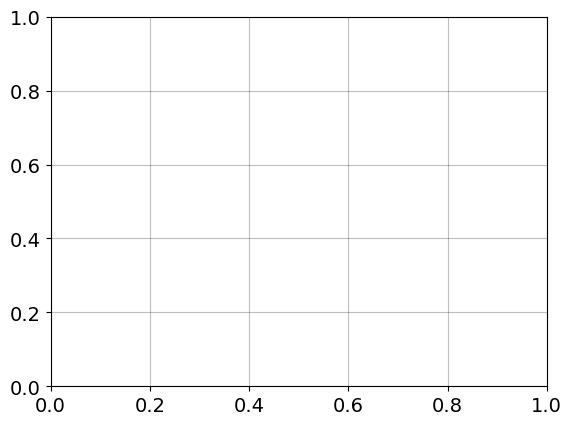

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) # 1,1,1 is (nrows, ncols, index)

Add some content:

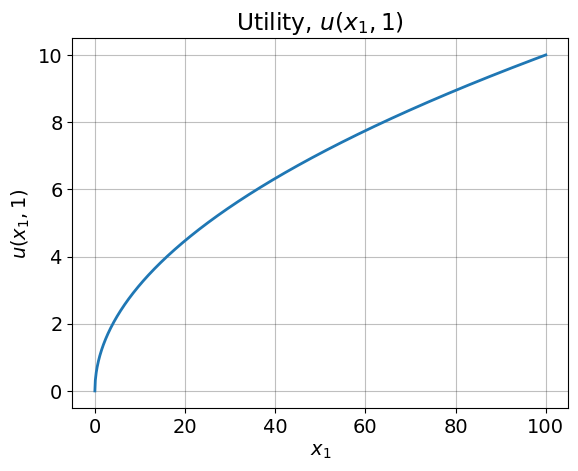

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(x1_vec,u_vec,ls='-',lw=2)

# ls is linestyle
# lw is lineweigth

ax.set_title('Utility, $u(x_1,1)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$u(x_1,1)$');

Add a lot of details:

xlim: (-5.0, 105.0)
ylim: (-0.5, 10.5)


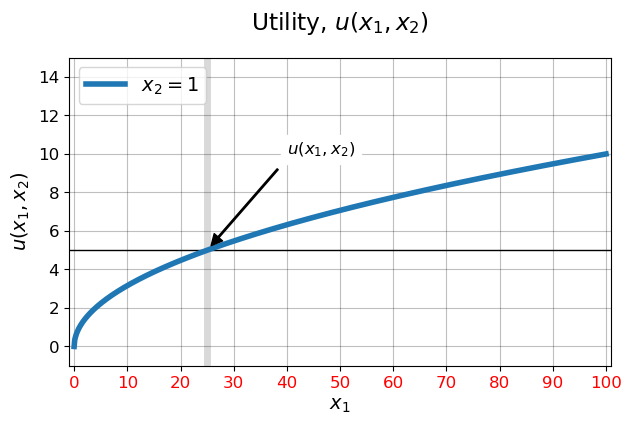

In [6]:
fig = plt.figure(figsize=(7,4)) # width x height in inches
ax = fig.add_subplot(1,1,1)

ax.plot(x1_vec,u_vec,ls='-',lw='4',label='$x_{2}=1$')

# lines
ax.axvline(25,color='black',lw=5,alpha=0.15,zorder=0)
ax.axhline(u_func(25,x2),color='black',lw=1,zorder=0)

# labels
ax.set_title('Utility, $u(x_1,x_2)$',pad=20)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$u(x_1,x_2)$')

ax.tick_params(axis='both',labelsize=12)
ax.tick_params(axis='x',labelcolor='red')

# lims
print('xlim:',ax.get_xlim())
ax.set_xlim([-1,101])
ax.set_xticks(np.arange(0,100+1,10))
print('ylim:',ax.get_ylim())
ax.set_ylim([-1,15])
ax.set_yticks(np.arange(0,14+1,2))

# annotate
ax.annotate('$u(x_1,x_2)$',xy=(25,u_func(25,x2)),xytext=(40,10),
          arrowprops=dict(facecolor='black',width=1,headwidth=8,headlength=8,shrink=0.05),
          fontsize=12,backgroundcolor='white',color='black')

# legend
ax.legend(loc='upper left'); # activate legend (uses the labels in ax.plot())

**What to change the plot in some other way?** Ask copilot or some other LLM.

Assume $x_{2} = 2$ is also a possibility.

In [7]:
x2_alt = 2.0
u_vec_2 = u_func(x1_vec,x2_alt)

Together:

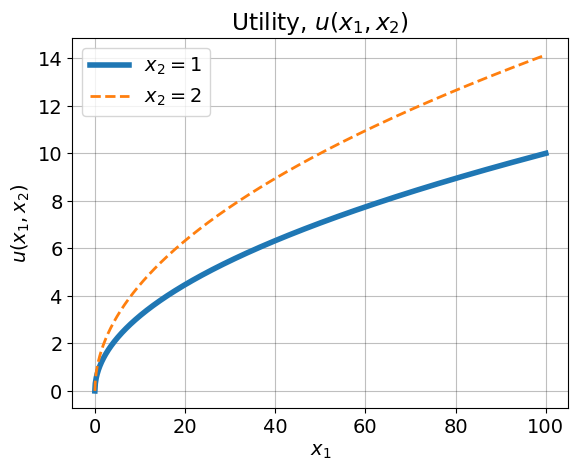

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(x1_vec,u_vec,ls='-',lw='4',label='$x_{2}=1$')
ax.plot(x1_vec,u_vec_2,ls='--',lw='2',label='$x_{2}=2$')

ax.set_title('Utility, $u(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$u(x_1,x_2)$')

ax.legend(loc='upper left');

Separate:

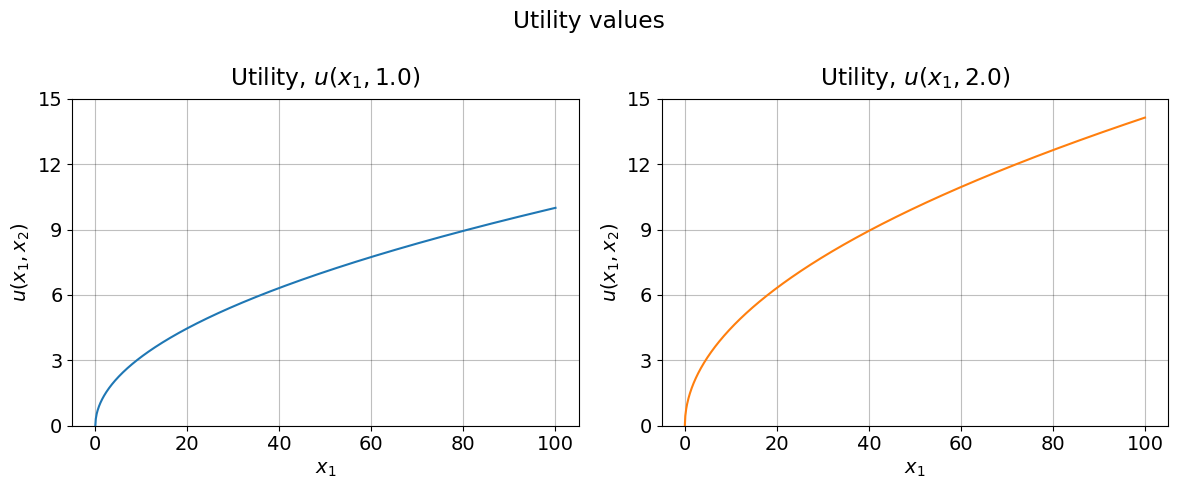

In [9]:
# default list of color
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# figure
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(x1_vec,u_vec,label='$x_{2}=1$',color=colors[0])
ax2.plot(x1_vec,u_vec_2,label='$x_{2}=2$',color=colors[1])

for ax,x2_now in zip([ax1, ax2],(x2,x2_alt)):
    ax.set_title(f'Utility, $u(x_1,{x2_now})$',pad=10)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$u(x_1,x_2)$')
    ax.set_ylim(0,15)
    ax.set_yticks(np.arange(0,15+1,3))

fig.suptitle('Utility values')
fig.tight_layout() # prettier

Many together:

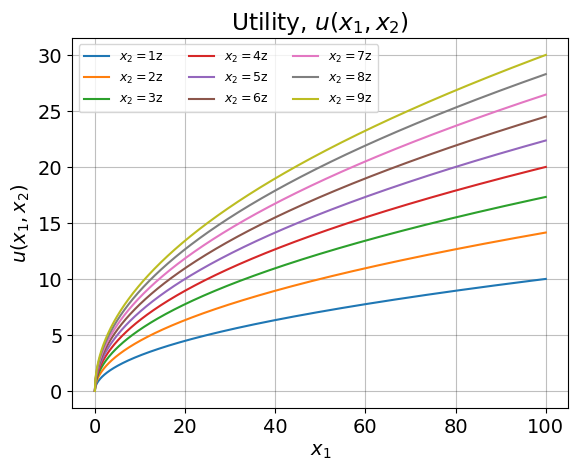

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

n = 10
for x2 in range(1,n):
    u_vec_x2 = u_func(x1_vec,x2)
    ax.plot(x1_vec,u_vec_x2,label=f'$x_{2} = {x2}$z')

ax.set_title('Utility, $u(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$u(x_1,x_2)$')
ax.legend(loc='upper left',ncol=3,prop={'size':9});

Other colors, other line styles:

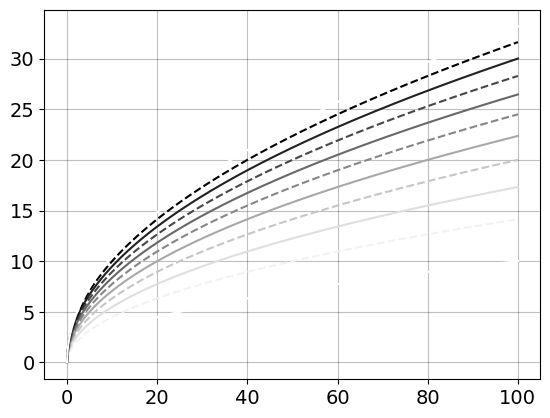

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

cmap_greys = plt.colormaps['Greys']
colors_greys = cmap_greys(np.linspace(0,1,10)) # 10 colors

# cycle through the properties
ax.set_prop_cycle(plt.cycler(color=colors_greys,ls=['-','--']*5))

n = 12
for x2 in range(1,n):
    u_vec_x2 = u_func(x1_vec,x2)
    ax.plot(x1_vec,u_vec_x2,label=f'$x_{2} = {x2}$z')    

### 1.3. <a id='toc1_3_'></a>[zorder](#toc0_)

The option `zorder` determines what is in the foreground and in the background.

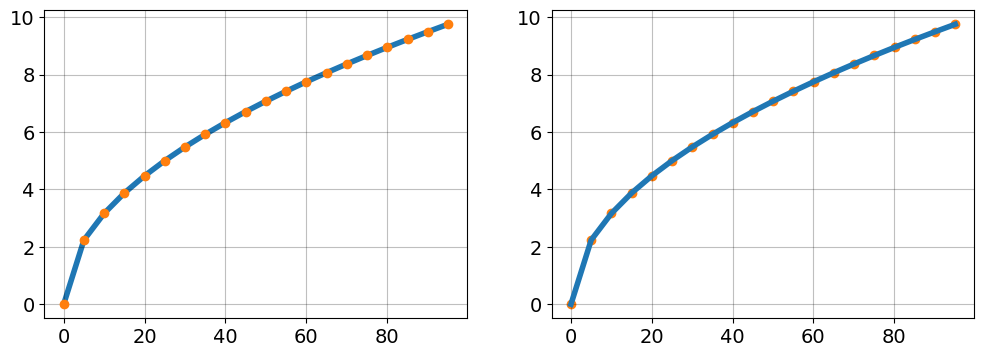

In [12]:
fig = plt.figure(figsize=(12,4))
for i,(zplot,zcatter) in enumerate(zip([1,2],[2,1])):
    
    ax = fig.add_subplot(1,2,1+i)

    k = 50
    ax.plot(x1_vec[::k],u_vec[::k],lw=4,color=colors[0],zorder=zplot)
    ax.plot(x1_vec[::k],u_vec[::k],ls='',marker='o',color=colors[1],zorder=zcatter)

## 2. <a id='toc2_'></a>[Other types of plots](#toc0_)

Draw some random noise:

In [13]:
rng = np.random.default_rng(12345)  # for reproducibility
N = 500
x1 = 3
x2 = 2
x1_noise = np.exp(rng.normal(0,0.1,N))
x2_noise = np.exp(rng.normal(0,0.2,N))

Plot histogram:

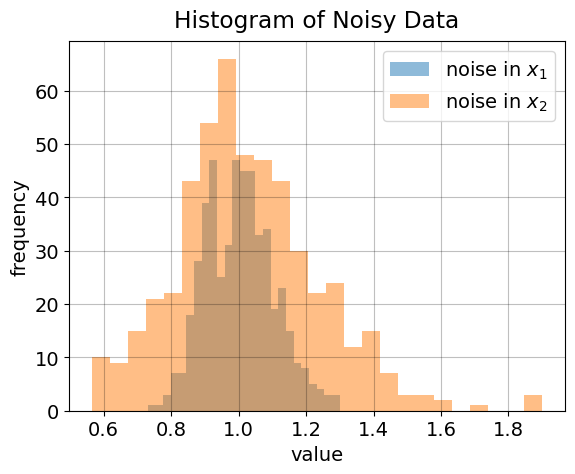

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(x1_noise,bins=25,alpha=0.5,label='noise in $x_1$')
ax.hist(x2_noise,bins=25,alpha=0.5,label='noise in $x_2$');

# labels
ax.set_title('Histogram of Noisy Data',pad=10)
ax.set_xlabel('value')
ax.set_ylabel('frequency')

# legend
ax.legend();

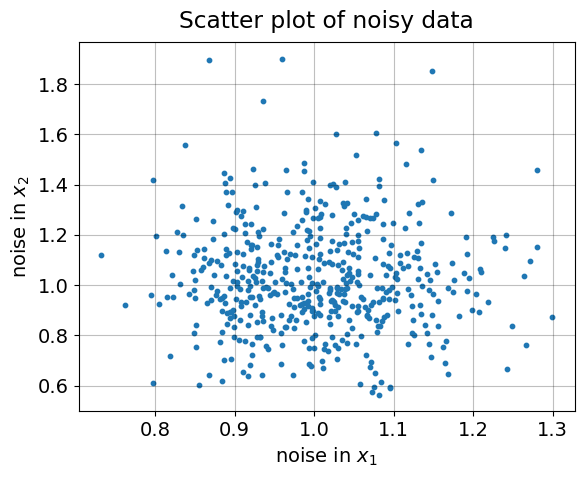

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x1_noise,x2_noise,s=10)
ax.set_title('Scatter plot of noisy data',pad=10)
ax.set_xlabel('noise in $x_1$')
ax.set_ylabel('noise in $x_2$');

Calculate noise utility measure:

In [16]:
x1_noise = x1 + x1_noise
x2_noise = x2 + x2_noise
u_noise = u_func(x1_noise,x2_noise)

Scatter plot with utility as colors

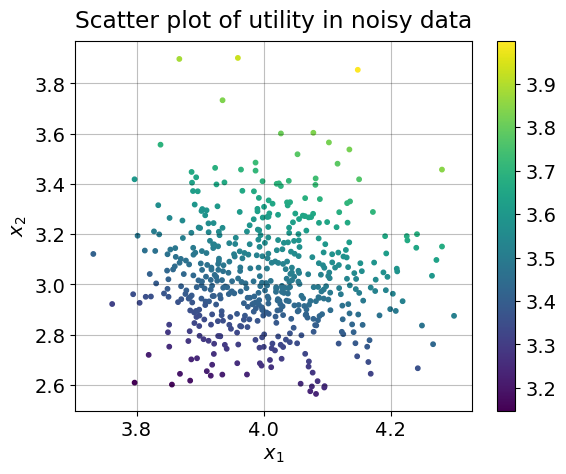

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

h = ax.scatter(x1_noise,x2_noise,s=10,c=u_noise)
fig.colorbar(h)

# labels
ax.set_title('Scatter plot of utility in noisy data',pad=10)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

## 3. <a id='toc3_'></a>[3-Dimensional plots](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Calculate an utility function on a grid](#toc0_)

In order to describe the shape of our utility function across both $x_{1}$ and $x_{2}$, we need to numerically evaluate it on a set of points. 

Thus, we calculate the utility function on a **2-dimensional grid** (`x1` and `x2`) with $N$ elements in each dimension:

In [18]:
# a. settings
N = 100 # number of elements
x_max = 10 # maximum value

# b. allocate 2d numpy arrays for x1 and x2
shape_tuple = (N,N)
x1_values = np.empty(shape_tuple) # allocate 2d numpy array with shape=(N,N)
x2_values = np.empty(shape_tuple)
u_values = np.empty(shape_tuple)

# c. fill numpy arrays using a nested loop
for i in range(N): # 0,1,...,N-1
    for j in range(N): # 0,1,...,N-1
        x1_values[i,j] = (i/(N-1))*x_max # in [0,x_max]
        x2_values[i,j] = (j/(N-1))*x_max # in [0,x_max]
        u_values[i,j] = u_func(x1_values[i,j],x2_values[i,j],alpha=0.25)

**Note:** x1_values and x2_values are **both 2d**. 

 
This is not strictly necessary in the present case. 1d arrays would suffice below in the nested loop and filling out of u_values.  
However, it makes them isomorphic with the mesh grids used for countour plots, which often need 2d mesh grids. 

**Alternatively:** Use the corresponding numpy function to create your grid:

In [19]:
# a. Create numbers distributed evenly between 0 and x_max
x_vec = np.linspace(0,x_max,N)

# b. Create meshgrids similar to x1_values and x2_values above
x1_mesh,x2_mesh = np.meshgrid(x_vec,x_vec,indexing='ij')

print('Dimension of grid over x1 (same as x2): ', x1_mesh.shape) # Note that the grid is 2d. u_func needs 2d to calculate element by element. 
u_values_mesh = u_func(x1_mesh, x2_mesh, alpha=0.25)

Dimension of grid over x1 (same as x2):  (100, 100)


Test whether the results are the same:

In [20]:
# a. maximum absolute difference
max_abs_diff = np.max(np.abs(u_values-u_values_mesh))
print(max_abs_diff) # very close to zero     

# b. test if all values are "close"
print(np.allclose(u_values,u_values_mesh))

2.6645352591003757e-15
True


### 3.2. <a id='toc3_2_'></a>[Plot the utility function](#toc0_)

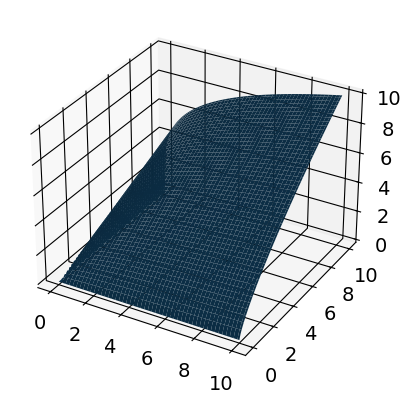

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d') # 3d axis 
ax.plot_surface(x1_values,x2_values,u_values);

**Making it pretty**: Use a colormap and set labels.  

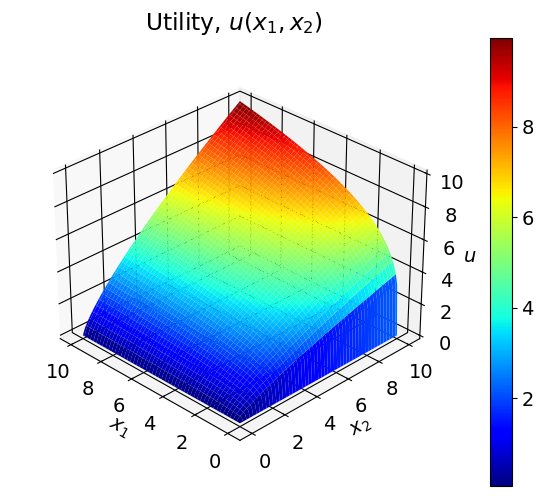

In [22]:
from matplotlib import cm # for colormaps

# a. actual plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
h = ax.plot_surface(x1_values,x2_values,u_values,cmap=cm.jet)
fig.colorbar(h)

# b. add labels
ax.set_title('Utility, $u(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$u$')
# pad z
ax.zaxis.labelpad = 0.20

# c. invert xaxis to bring origin in center front
ax.view_init(azim=-45,elev=30) # azim is azimuthal angle, elev is elevation angle
ax.invert_xaxis()
ax.set_box_aspect([4,4,3],zoom=0.9)

fig.tight_layout(pad=0.1)

Saving your figure is easy:

In [23]:
fig.savefig('someplot.pdf') # or e.g. .png 

## 

## 4. <a id='toc4_'></a>[Trick: Show link to file](#toc0_)

In [24]:
from IPython.display import HTML, display

In [25]:
x = np.arange(10) # numpy array
y = np.sin(x) # numpy array

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x,y,marker='o',markersize=5)

filepath = 'sin.png'
fig.savefig(filepath)

plt.close(fig)
display(HTML(f'<a href="{filepath}">{filepath}</a>'))

## 5. <a id='toc5_'></a>[Summary](#toc0_)

The main takeaways are:

- `fig` and `ax` objects with all their options
- `.plot`, `.scatter`, `.hist`
- 3D plots